In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [36]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [39]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069


In [41]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069&q=Boston


In [42]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [43]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 59.14,
  'feels_like': 50.31,
  'temp_min': 57,
  'temp_max': 61,
  'pressure': 1018,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 290, 'gust': 16.11},
 'clouds': {'all': 7},
 'dt': 1616864939,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1616841291,
  'sunset': 1616886238},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [44]:
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [45]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat,lng,max_temp,humidity,clouds,wind)

42.3584 -71.0598 61 35 7 9.22


In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-27 17:08:59'

In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})

# If an error is experienced, skip the city.   
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | collie
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | australind
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | hervey bay
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | maragogi
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | kachiry
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1

Processing Record 40 of Set 4 | ciudad guayana
Processing Record 41 of Set 4 | nagato
Processing Record 42 of Set 4 | sambava
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | kazachinskoye
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | middleton
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | san carlos de bariloche
Processing Record 49 of Set 4 | naliya
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | salta
Processing Record 2 of Set 5 | znamenskoye
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | tarata
Processing Record 5 of Set 5 | kupino
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 5 | ternate
Processing Record 10 of Set 5 | basco
Processing Record 11 of Set 5 | bluff
Processing Record 12

Processing Record 31 of Set 8 | springdale
Processing Record 32 of Set 8 | pervoye maya
Processing Record 33 of Set 8 | saleaula
City not found. Skipping...
Processing Record 34 of Set 8 | ilulissat
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | baghdad
Processing Record 37 of Set 8 | san remo
Processing Record 38 of Set 8 | kirovskiy
Processing Record 39 of Set 8 | razdolnoye
Processing Record 40 of Set 8 | kevsala
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | lasa
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | cooma
Processing Record 45 of Set 8 | orsha
Processing Record 46 of Set 8 | upernavik
Processing Record 47 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 48 of Set 8 | santa isabel do rio negro
Processing Record 49 of Set 8 | inta
Processing Record 50 of Set 8 | ouadda
Processing Record 1 of Set 9 | lolua
City not found. Skipping...
Processing Record 2 of Set 9 | mamallapuram
Pro

Processing Record 17 of Set 12 | nizhnekamsk
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | iturama
Processing Record 21 of Set 12 | surab
Processing Record 22 of Set 12 | necochea
Processing Record 23 of Set 12 | ayolas
Processing Record 24 of Set 12 | chacabuco
Processing Record 25 of Set 12 | andenes
Processing Record 26 of Set 12 | singkang
Processing Record 27 of Set 12 | itaituba
Processing Record 28 of Set 12 | morelia
Processing Record 29 of Set 12 | progreso
Processing Record 30 of Set 12 | hearst
Processing Record 31 of Set 12 | dundee
Processing Record 32 of Set 12 | puerto baquerizo moreno
Processing Record 33 of Set 12 | dalby
Processing Record 34 of Set 12 | augusto correa
Processing Record 35 of Set 12 | imbituba
Processing Record 36 of Set 12 | garrel
Processing Record 37 of Set 12 | heishan
Processing Record 38 of Set 12 | saint-georges
Processing Record 39 of Set 12 | mouzakion
City not found. Sk

In [48]:
len(city_data)

590

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,67.30,74,18,19.82,ZA,2021-03-27 17:09:21
1,Mar Del Plata,-38.0023,-57.5575,64.99,77,75,23.02,AR,2021-03-27 17:09:21
2,Collie,-33.3667,116.1500,55.99,80,76,5.21,AU,2021-03-27 17:09:22
3,Punta Arenas,-53.1500,-70.9167,64.40,52,0,20.71,CL,2021-03-27 17:09:22
4,Ushuaia,-54.8000,-68.3000,57.20,62,75,14.97,AR,2021-03-27 17:06:00
5,Australind,-33.2667,115.7167,55.99,80,56,6.11,AU,2021-03-27 17:09:22
6,Portland,45.5234,-122.6762,50.00,66,75,1.70,US,2021-03-27 17:06:18
7,Mataura,-46.1927,168.8643,55.99,91,52,1.01,NZ,2021-03-27 17:09:22
8,Guerrero Negro,27.9769,-114.0611,63.79,48,0,4.18,MX,2021-03-27 17:09:23
9,Hervey Bay,-25.2986,152.8535,71.01,79,5,1.01,AU,2021-03-27 17:09:23


In [50]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-03-27 17:09:21,-33.5906,26.8910,67.30,74,18,19.82
1,Mar Del Plata,AR,2021-03-27 17:09:21,-38.0023,-57.5575,64.99,77,75,23.02
2,Collie,AU,2021-03-27 17:09:22,-33.3667,116.1500,55.99,80,76,5.21
3,Punta Arenas,CL,2021-03-27 17:09:22,-53.1500,-70.9167,64.40,52,0,20.71
4,Ushuaia,AR,2021-03-27 17:06:00,-54.8000,-68.3000,57.20,62,75,14.97
...,...,...,...,...,...,...,...,...,...
585,Roald,NO,2021-03-27 17:11:30,62.5833,6.1333,41.00,81,75,17.27
586,Uyuni,BO,2021-03-27 17:07:50,-20.4597,-66.8250,62.91,37,20,16.24
587,Batemans Bay,AU,2021-03-27 17:11:30,-35.7167,150.1833,57.00,93,19,3.24
588,Inverell,AU,2021-03-27 17:11:30,-29.7833,151.1167,55.99,96,0,4.38


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [53]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/21'

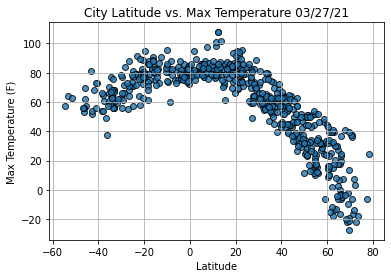

In [54]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

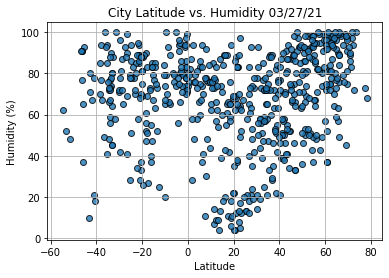

In [55]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

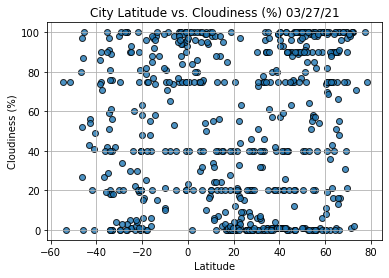

In [56]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

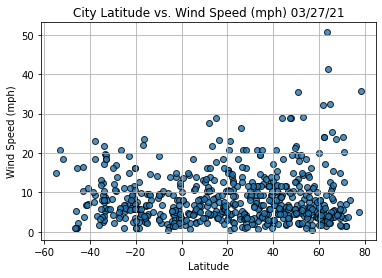

In [57]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress
        
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [59]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Portland,US,2021-03-27 17:06:18,45.5234,-122.6762,50.00,66,75,1.70
8,Guerrero Negro,MX,2021-03-27 17:09:23,27.9769,-114.0611,63.79,48,0,4.18
12,Los Llanos De Aridane,ES,2021-03-27 17:09:24,28.6585,-17.9182,68.00,73,40,9.22
16,Chokurdakh,RU,2021-03-27 17:09:24,70.6333,147.9167,-6.54,89,99,5.41
18,Kachiry,KZ,2021-03-27 17:09:25,53.0675,76.1036,34.03,92,100,14.52


In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

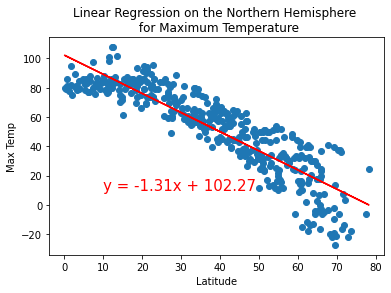

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (10,10))

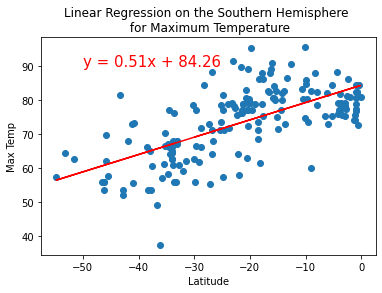

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (-50,90))

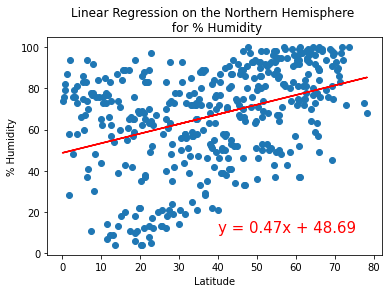

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", 
                       "% Humidity", (40,10))

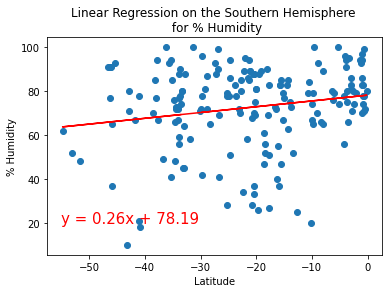

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", 
                       "% Humidity", (-55,20))

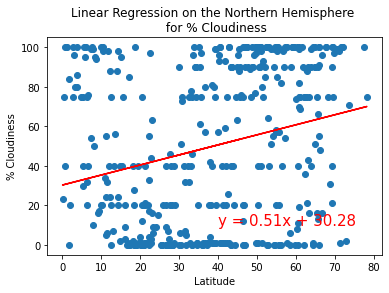

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (40,10))

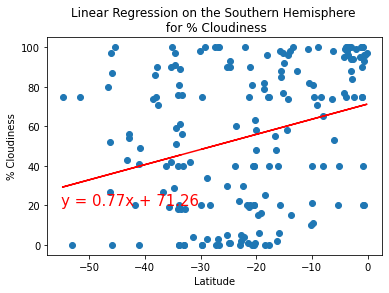

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (-55,20))

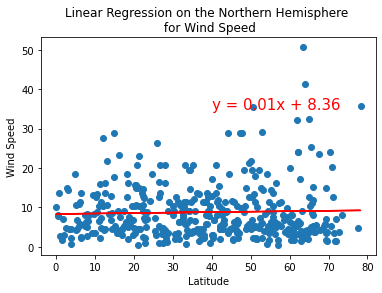

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (40,35))

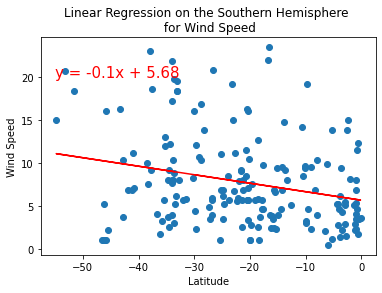

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (-55,20))